***Crear un programa en Python utilizando la biblioteca NumPy para simular y
analizar un sistema de control dinámico en lazo abierto. Realizar una
comparación con el mismo sistema en lazo cerrado.***

### Simular el control de la velocidad de un motor, con el sistema de lazo cerrado y el sistema de lazo abierto.

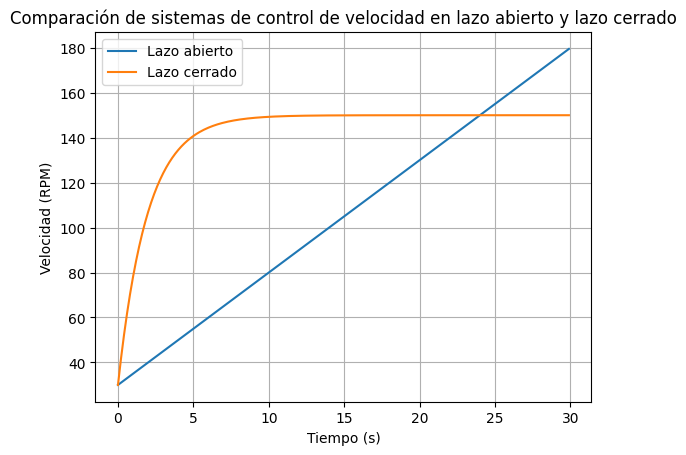

In [12]:
import numpy as np # Importamos la librería numpy para trabajar con arreglos numéricos
import matplotlib.pyplot as plt  # Importamos la librería matplotlib para graficar
# Parámetros
velocidad_deseada = 150 # Velocidad que queremos alcanzar en RPM
velocidad_inicial= 30 #velocidad inicial del motor
kp = 0.5  # Ganancia proporcional del controlador
tiempo_total = 30  # Duración total de la simulación en segundos
dt = 0.1  # Intervalo de tiempo en segundos para la simulación

# Crear vectores de tiempo y velocidad
tiempo = np.arange(0, tiempo_total, dt) #np.arange(0, tiempo_total, dt) genera un array que comienza en 0 y termina justo antes de tiempo_total, con pasos de tamaño dt.
velocidadLazoAbierto = np.zeros_like(tiempo) #crea un nuevo array de NumPy con la misma forma y tipo de datos que el array tiempo, pero todos sus elementos inicializados a cero.
velocidadLazoCerrado = np.zeros_like(tiempo)

# Inicializar la velocidad del motor en la velocidad inicial
velocidadLazoAbierto[0] = velocidad_inicial
velocidadLazoCerrado[0] = velocidad_inicial

# Simular sistema en lazo cerrado
for i in range(1, len(tiempo)):
    error = velocidad_deseada - velocidadLazoCerrado[i - 1]# Calcular el error entre la temperatura objetivo y la temperatura actual
    correccion = kp * error * dt  # Calculamos la corrección proporcional a aplicar
    velocidadLazoCerrado[i] = velocidadLazoCerrado[i-1]+ correccion  # Actualizamos la velocidad actual del motor con la corrección

# Simular sistema en lazo abierto. La velocidad se ajusta aplicando un voltaje constante
for i in range(1, len(tiempo)):
    voltajeConstante = 5
    velocidadLazoAbierto[i] = velocidadLazoAbierto[i - 1] + (voltajeConstante*dt )

# Crear gráficos de las temperaturas en lazo abierto y lazo cerrado
plt.figure()
plt.plot(tiempo, velocidadLazoAbierto, label='Lazo abierto')
plt.plot(tiempo, velocidadLazoCerrado, label='Lazo cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (RPM)')
plt.legend()
plt.title('Comparación de sistemas de control de velocidad en lazo abierto y lazo cerrado')
plt.grid(True)  # Mostramos la cuadrícula en el gráfico
plt.show()  # Mostramos el gráfico




Con base en la simulación realizada, puedo concluir lo siguiente:

El sistema de lazo cerrado muestra un rendimiento superior en comparación con el lazo abierto en términos de alcanzar y mantener la velocidad deseada del motor.

*   Lazo cerrado: Una vez que se activa el controlador, la velocidad del motor converge rápidamente hacia el valor deseado. La respuesta es prácticamente instantánea y estable, ya que el sistema ajusta continuamente la velocidad del motor para reducir el error entre la velocidad deseada y la velocidad real. Una vez que se alcanza la velocidad deseada, el sistema la mantiene de manera constante a lo largo del tiempo, minimizando cualquier desviación.
*   Lazo abierto: El sistema de lazo abierto muestra un comportamiento más lento y menos preciso. La velocidad del motor aumenta gradualmente en respuesta al voltaje constante aplicado, pero no hay un mecanismo para ajustar esta velocidad en función del error entre la velocidad deseada y la velocidad real. Como resultado, la velocidad del motor continúa aumentando incluso después de alcanzar la velocidad deseada, ya que no hay una retroalimentación para corregir este exceso.

